# Data Analysis

In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats

In [10]:
df = pd.read_csv('processed_data.csv')
df.head()

,Tiempo_Cola_min,Tiempo_Servicio_min,Tiempo_Total_Sistema_min
0,12.083333,6.466667,18.550000
1,18.250000,2.350000,20.600000
2,17.350000,1.383333,18.733333
3,11.966667,1.633333,13.600000
4,12.083333,3.983333,16.066667


## Tiempo en la cola

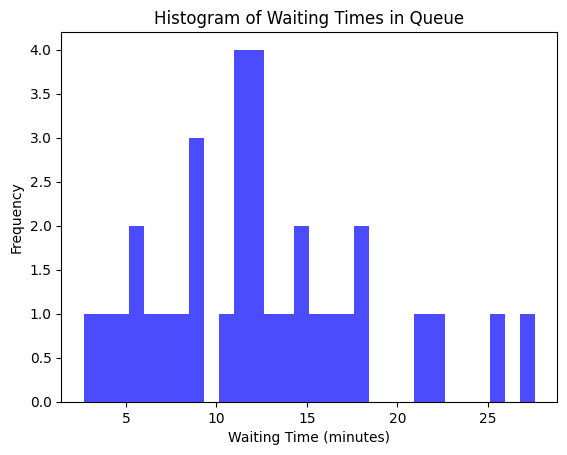

In [11]:
# Histogram of waiting times
plt.hist(df['Tiempo_Cola_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Waiting Times in Queue')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Test for normality
k2, p = stats.normaltest(df['Tiempo_Cola_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis cannot be rejected. The data is normally distributed.


## Tiempo de servicio

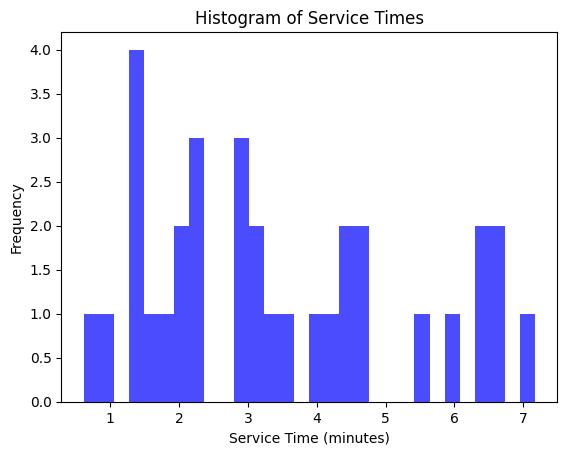

In [13]:
# Histogram of waiting times
plt.hist(df['Tiempo_Servicio_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Service Times')
plt.xlabel('Service Time (minutes)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Test for normality
k2, p = stats.normaltest(df['Tiempo_Servicio_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis cannot be rejected. The data is normally distributed.


## Tiempo total en el sistema

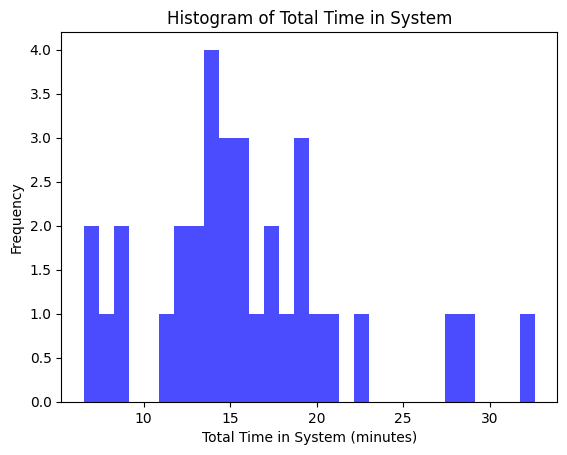

In [15]:
# Histogram of waiting times
plt.hist(df['Tiempo_Total_Sistema_min'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Total Time in System')
plt.xlabel('Total Time in System (minutes)')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Test for normality
k2, p = stats.normaltest(df['Tiempo_Total_Sistema_min'])
alpha = 0.05
if p < alpha:
    print("The null hypothesis can be rejected. The data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected. The data is normally distributed.")

The null hypothesis can be rejected. The data is not normally distributed.
